In [6]:
import pandas as pd 
import numpy as np  

In [7]:
df=pd.read_csv(r'C:\DS,DA\Anime_Rating\anime.csv')

In [8]:
df.shape

(12294, 7)

In [9]:
df.size

86058

In [10]:
df.info

<bound method DataFrame.info of        anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Superna

In [11]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [12]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [13]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [14]:
df[["genre","type"]].value_counts()

genre                               type   
Hentai                              OVA        811
Music                               Music      242
Comedy                              TV         166
                                    Special    140
Dementia                            Movie      124
                                              ... 
Action, Drama, Sci-Fi, Super Power  TV           1
Action, Drama, Seinen               Special      1
Thriller                            Special      1
Vampire                             Special      1
Drama, Fantasy, Shoujo              TV           1
Name: count, Length: 4944, dtype: int64

In [15]:
df.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [16]:
df[["anime_id","name","type","episodes","rating","members"]].isnull().sum()

anime_id      0
name          0
type         25
episodes      0
rating      230
members       0
dtype: int64

Cleaning the data

In [17]:
df[df['name'].str.startswith('Ginta')]['name'].unique()


array(['Gintama°', 'Gintama&#039;',
       'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
       'Gintama&#039;: Enchousen', 'Gintama',
       'Gintama°: Aizome Kaori-hen',
       'Gintama: Yorinuki Gintama-san on Theater 2D',
       'Gintama Movie: Shinyaku Benizakura-hen',
       'Gintama: Shiroyasha Koutan', 'Gintama: Shinyaku Benizakura-hen',
       'Gintama: Jump Festa 2014 Special', 'Gintama: Dai Hanseikai',
       'Gintama: Jump Festa 2015 Special',
       'Gintama: Nanigoto mo Saiyo ga Kanjin nano de Tasho Senobisuru Kurai ga Choudoyoi',
       'Gintama x Mameshiba', 'Gintama (2017)'], dtype=object)

In [18]:
df["name"]=df["name"].drop_duplicates()

In [19]:
df=df.drop_duplicates()

In [20]:
df['name'] = df['name'].str.strip()


In [21]:
df['name'] = df['name'].str.replace("&#039;", "'", regex=False) 


In [22]:
df['name'] = df['name'].str.replace("[^a-zA-Z0-9\s]", "", regex=True)

In [23]:
df['name'] = df['name'].str.title()

In [24]:
df = df.dropna(subset=['name'])

In [25]:
df['name'].unique()

array(['Kimi No Na Wa', 'Fullmetal Alchemist Brotherhood', 'Gintama', ...,
       'Violence Gekiga David No Hoshi',
       'Violence Gekiga Shin David No Hoshi Inma Densetsu',
       'Yasuji No Pornorama Yacchimae'], dtype=object)

In [26]:
df = df[df['rating'] >= 7]

In [27]:

df = df[df['rating'].notnull()]

In [28]:
df = df.dropna(subset=['genre'])


In [29]:
df.shape

(3914, 7)

In [30]:
df = df.sort_values(by='rating', ascending=False)

In [31]:
df = df.drop_duplicates(subset=['name', 'genre'], keep='first')


In [40]:
df.to_csv('anime_output.csv')

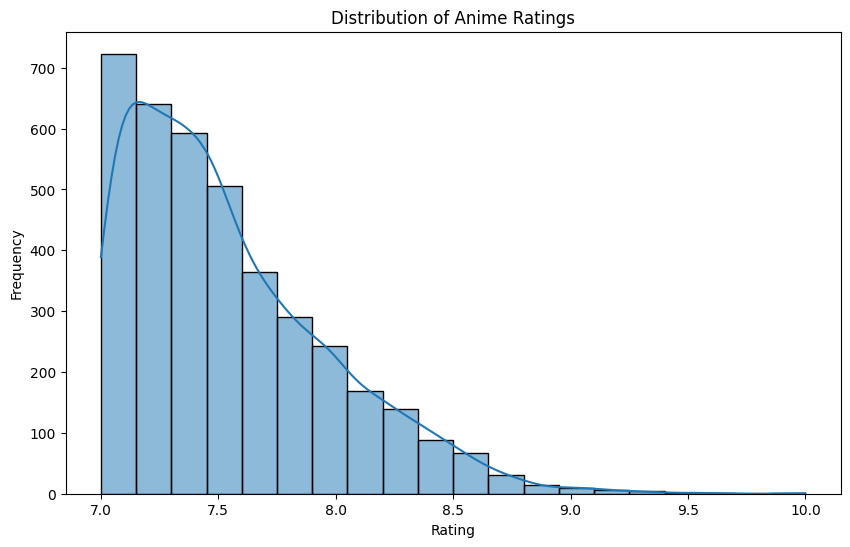

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of anime ratings
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


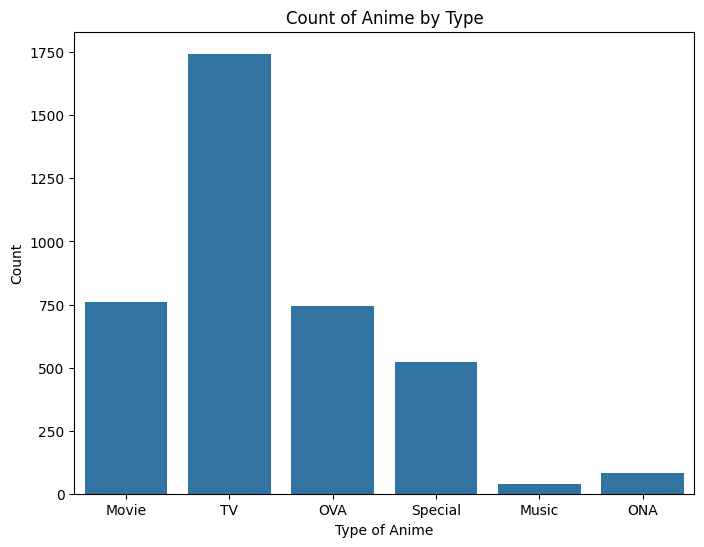

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='type')
plt.title('Count of Anime by Type')
plt.xlabel('Type of Anime')
plt.ylabel('Count')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_3812\2653369656.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated_anime, y='name', x='rating', palette='magma')


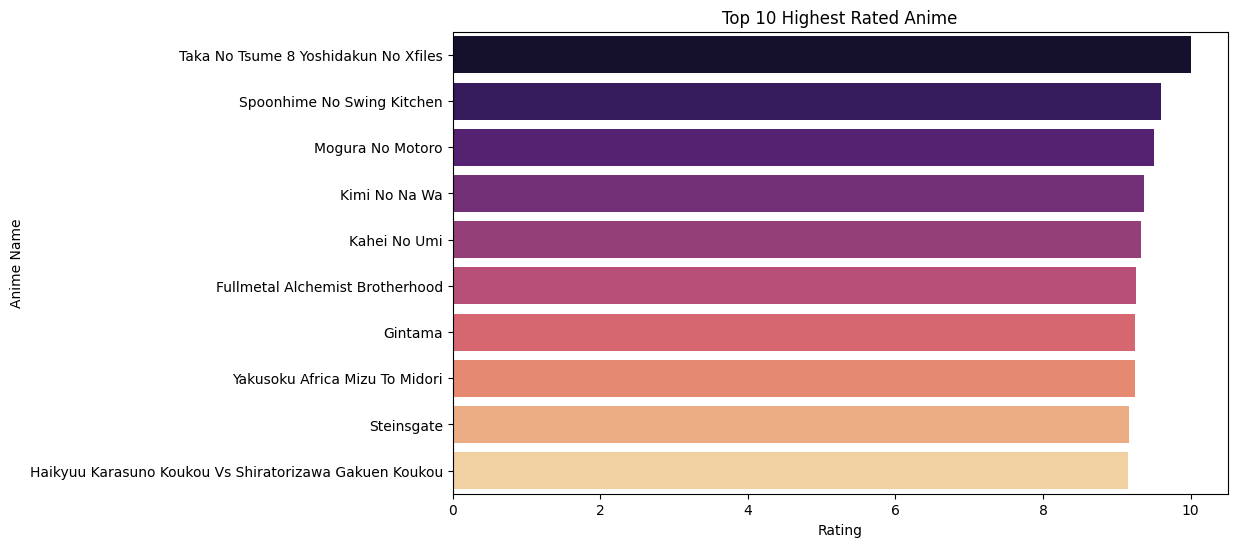

In [34]:
# Find the top 10 highest-rated anime
top_rated_anime = df.nlargest(10, 'rating')

plt.figure(figsize=(10,6))
sns.barplot(data=top_rated_anime, y='name', x='rating', palette='magma')
plt.title('Top 10 Highest Rated Anime')
plt.xlabel('Rating')
plt.ylabel('Anime Name')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_3812\2223235627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


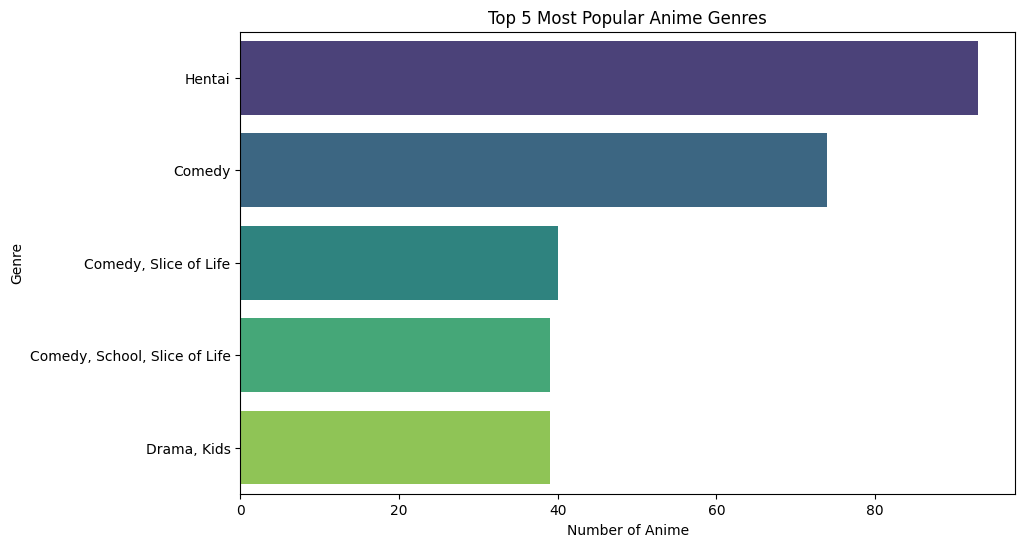

In [35]:
# Count the number of anime in each genre
top_genres = df['genre'].value_counts().nlargest(5)

# Plot the top 5 most popular genres
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 5 Most Popular Anime Genres')
plt.xlabel('Number of Anime')
plt.ylabel('Genre')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_3812\529493675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_popular, y='name', x='members', palette='viridis')


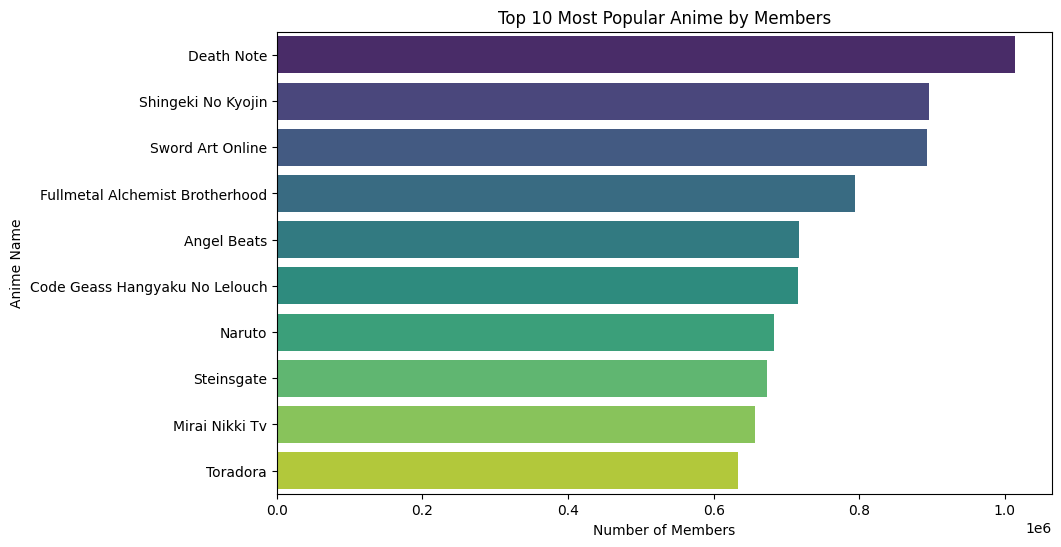

In [36]:
top_10_popular = df.nlargest(10, 'members')

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_popular, y='name', x='members', palette='viridis')
plt.title('Top 10 Most Popular Anime by Members')
plt.xlabel('Number of Members')
plt.ylabel('Anime Name')
plt.show()
